In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [119]:
df = pd.read_csv("C:/Users/victus/Documents/Presentation_project/Obesitydata.csv")

In [120]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [121]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [122]:
df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [123]:
df.shape

(2111, 17)

In [124]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [125]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [127]:
# Sütun başına benzersiz değer sayısı.
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [128]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Numerical Column Distribution

In [129]:
df['Age'].value_counts()

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

In [130]:
df['Height'].value_counts()

1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64

In [131]:
df['Weight'].value_counts()

80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64

# Categorical Column Distribution

In [132]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [133]:
df['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [134]:
#'NObeyesdad' için benzersiz değerleri ve sıklığı 
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

## Kategorik sütunların nümerik forma dönüştürülmesi ve gerekli olmayan sütunların çıkarılması

In [135]:
# Yeni bir sütun ekleyerek obezite durumunu 1 (obez) veya 0 (obez olmayan) olarak etiketleyin
df['Obesity_Status'] = df['NObeyesdad'].apply(lambda x: 1 if x.startswith('Obesity') else 0)

# İlk birkaç satırı görüntüle
print(df[['NObeyesdad', 'Obesity_Status']].head())

            NObeyesdad  Obesity_Status
0        Normal_Weight               0
1        Normal_Weight               0
2        Normal_Weight               0
3   Overweight_Level_I               0
4  Overweight_Level_II               0


In [136]:
df = df.drop('NObeyesdad', axis=1)

In [137]:
# MTRANS sütunundaki benzersiz değerleri al
unique_mtrans_values = df['MTRANS'].unique()

# Her bir benzersiz değer için bir sütun ekleyerek dummies oluştur
for value in unique_mtrans_values:
    df[f'MTRANS_{value}'] = df['MTRANS'].apply(lambda x: 1 if x == value else 0)

# Orijinal MTRANS sütununu ve artık gerekli olmayan diğer sütunları çıkar
df = df.drop(['MTRANS'], axis=1)

# Label Encoding

In [138]:
label_encoder = preprocessing.LabelEncoder()

In [139]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight']= label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC']= label_encoder.fit_transform(df['FAVC'])
df['CAEC']= label_encoder.fit_transform(df['CAEC'])
df['SMOKE']= label_encoder.fit_transform(df['SMOKE'])
df['SCC']= label_encoder.fit_transform(df['SCC'])
df['CALC']= label_encoder.fit_transform(df['CALC'])

In [140]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,Obesity_Status,MTRANS_Public_Transportation,MTRANS_Walking,MTRANS_Automobile,MTRANS_Motorbike,MTRANS_Bike
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,0,0.0,1.0,3,0,1,0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,1,3.0,0.0,2,0,1,0,0,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,0,2.0,1.0,1,0,1,0,0,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2.0,0.0,1,0,0,1,0,0,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,0,0.0,0.0,2,0,1,0,0,0,0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,...,0,0.0,0.0,2,0,0,0,1,0,0
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,...,0,1.0,0.0,2,0,0,0,0,1,0
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,...,0,3.0,0.0,2,0,1,0,0,0,0
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,...,0,1.0,1.0,1,0,1,0,0,0,0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,...,0,1.0,1.0,3,0,1,0,0,0,0


In [141]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,Obesity_Status,MTRANS_Public_Transportation,MTRANS_Walking,MTRANS_Automobile,MTRANS_Motorbike,MTRANS_Bike
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,0,1.676269,0.906247,2,1,1,0,0,0,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,0,1.341390,0.599270,2,1,1,0,0,0,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,0,1.414209,0.646288,2,1,1,0,0,0,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,0,1.139107,0.586035,2,1,1,0,0,0,0
2110,0,23.664709,1.738836,133.472641,1,1,3.0,3.0,2,0,...,0,1.026452,0.714137,2,1,1,0,0,0,0


In [142]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'Obesity_Status', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'MTRANS_Automobile', 'MTRANS_Motorbike',
       'MTRANS_Bike'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [144]:
df.shape

(2111, 21)

In [37]:
df_data = df.duplicated().any()

In [145]:
df_data

True

In [146]:
df = pd.DataFrame(df)

# Duplicate values'ları tespit et
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
     Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
98        0  21.0    1.52    42.0                               0     0   3.0   
106       0  25.0    1.57    55.0                               0     1   2.0   
174       1  21.0    1.62    70.0                               0     1   2.0   
179       1  21.0    1.62    70.0                               0     1   2.0   
184       1  21.0    1.62    70.0                               0     1   2.0   
209       0  22.0    1.69    65.0                               1     1   2.0   
309       0  16.0    1.66    58.0                               0     0   2.0   
460       0  18.0    1.62    55.0                               1     1   2.0   
467       1  22.0    1.74    75.0                               1     1   3.0   
496       1  18.0    1.72    53.0                               1     1   2.0   
527       0  21.0    1.52    42.0                               0    

# Data Visualization

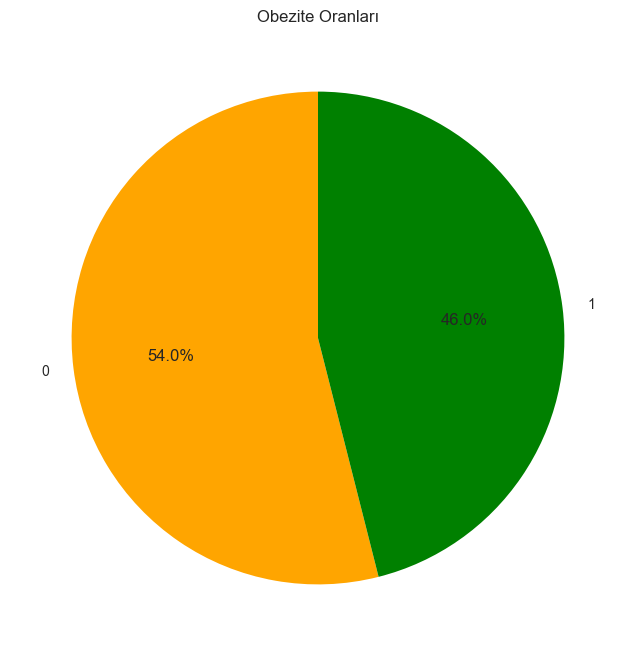

In [147]:
# Obezite oranlarını hesapla
obesity_counts = df['Obesity_Status'].value_counts()

# Pasta grafiği çizimi
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange','green'])
plt.title('Obezite Oranları')
plt.show()

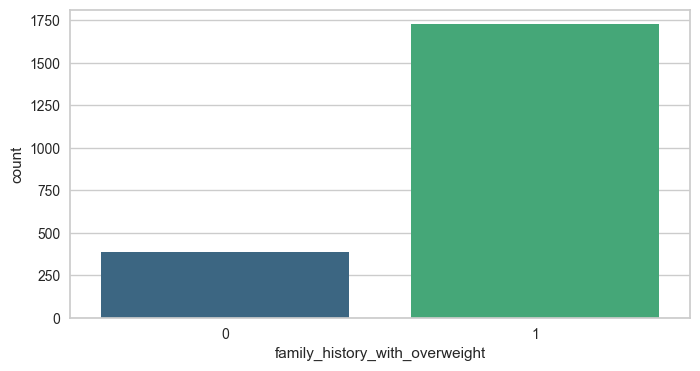

In [148]:
# family_history_with_overweight

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["family_history_with_overweight"], palette="viridis")
plt.show()

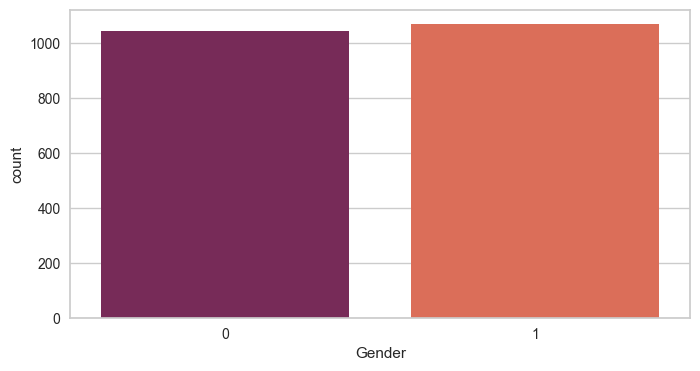

In [151]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Gender"], palette="rocket")
plt.show()

In [ ]:
Cinsiyet değişkeninin dengeli olduğunu söyleyebiliriz.

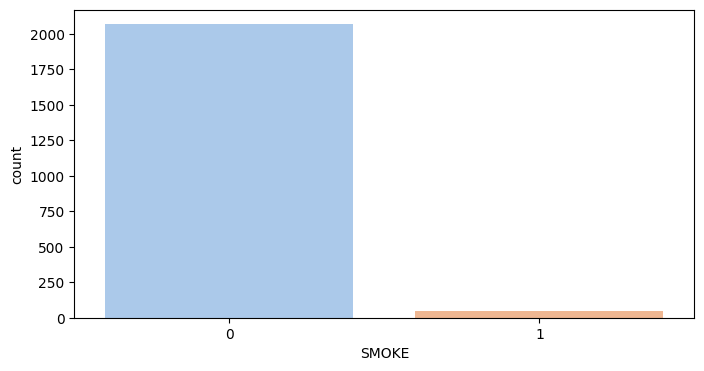

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["SMOKE"], palette="pastel")
plt.show()

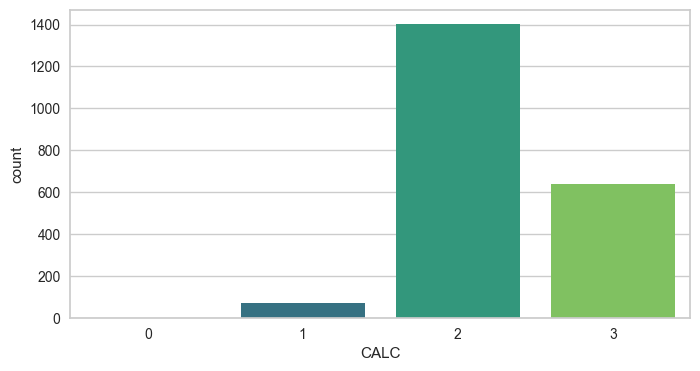

In [89]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["CALC"], palette="viridis")
plt.show()

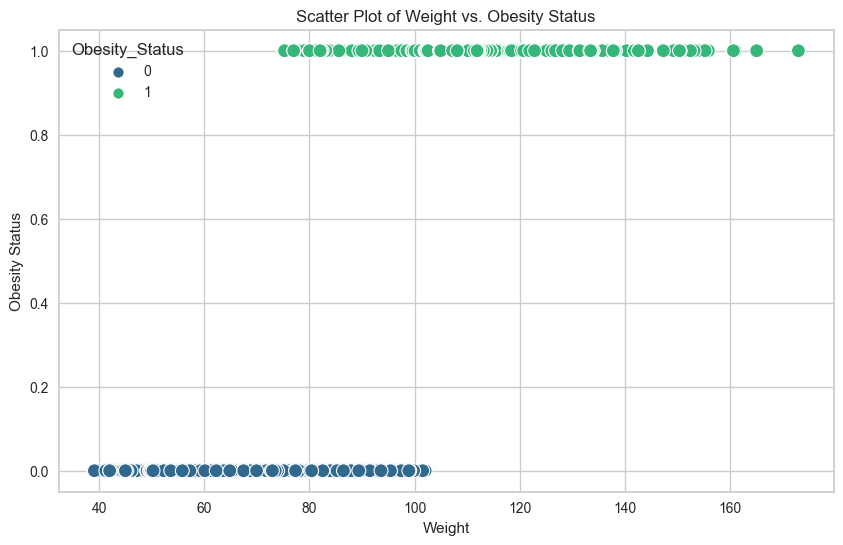

In [170]:
df = pd.DataFrame(df)

# Scatter plot çizin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Obesity_Status', data=df, hue='Obesity_Status', palette='viridis', s=100)
plt.title('Scatter Plot of Weight vs. Obesity Status')
plt.xlabel('Weight')
plt.ylabel('Obesity Status')
plt.show()

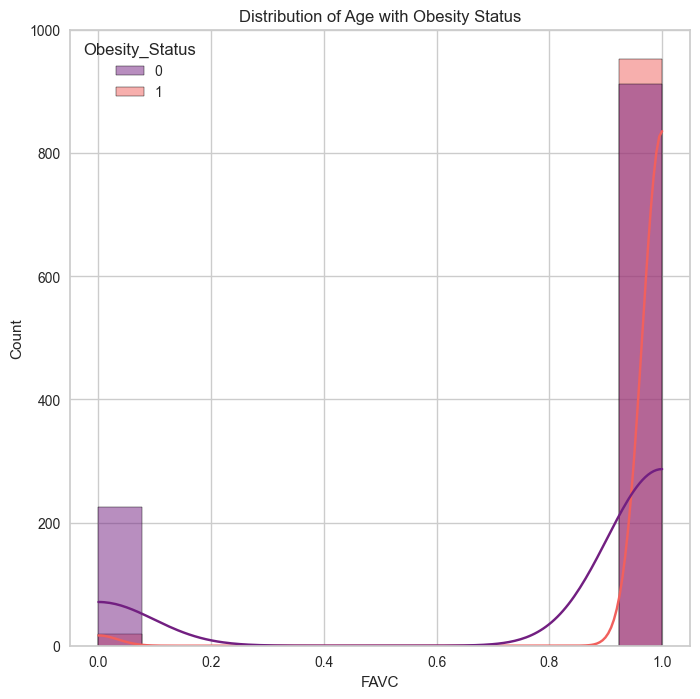

In [88]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='FAVC', hue='Obesity_Status', kde=True, palette='magma')
plt.title('Distribution of Age with Obesity Status')
plt.show()

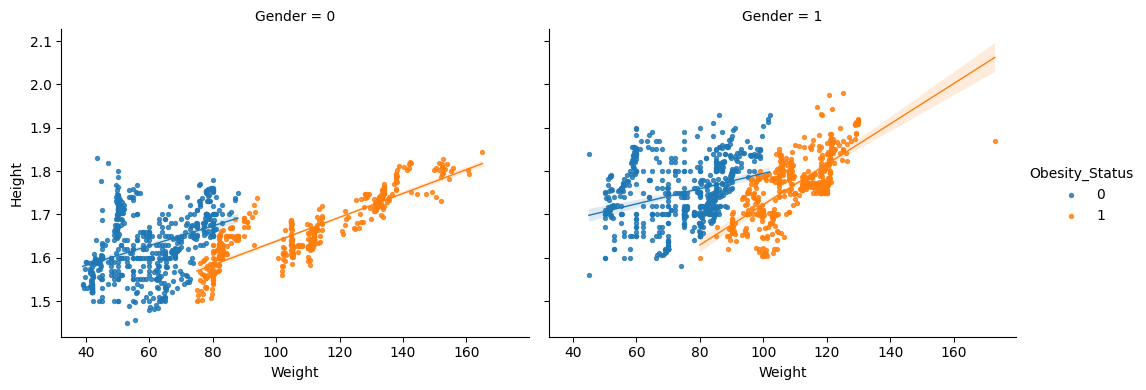

In [43]:
sns.lmplot(
    data= df,
    x="Weight",
    y="Height",
    col="Gender",
    height=4,
    aspect=1.3,
    hue="Obesity_Status",
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
    palette="tab10",
)
plt.show()

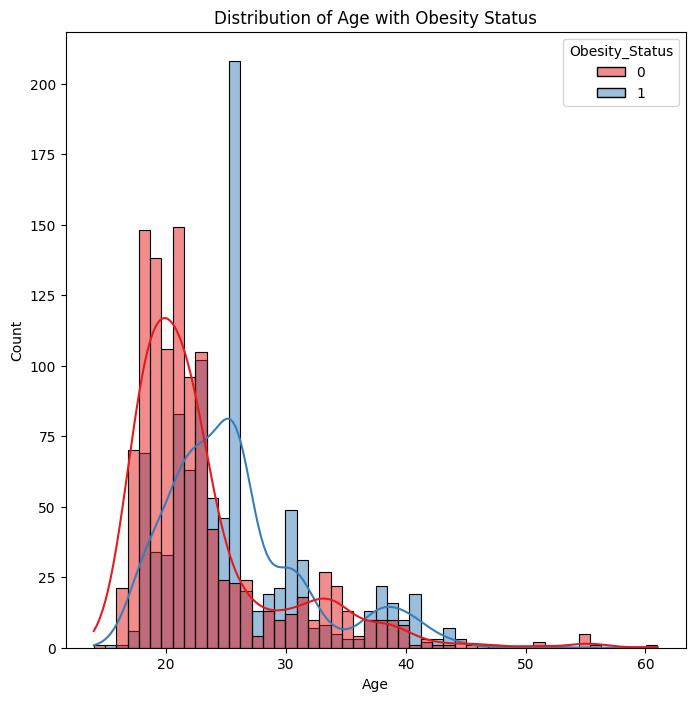

In [44]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='Age', hue='Obesity_Status', kde=True, palette='Set1')
plt.title('Distribution of Age with Obesity Status')
plt.show()

Çoğu yaş 19 ila 25 arasındadır.

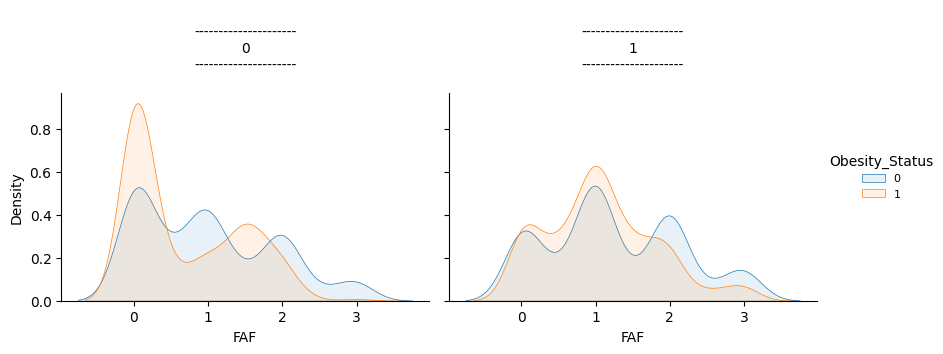

In [45]:
g = sns.FacetGrid(
    data= df[["Gender", "FAF", "Obesity_Status"]],
    col="Gender",
    hue="Obesity_Status",
    palette="tab10",
    height=3,
    aspect=1.4,
)
g.map_dataframe(sns.kdeplot, x="FAF", fill=True, alpha=0.1, linewidth=0.5)
g.set_titles(
    col_template="\n---------------------\n{col_name}\n---------------------\n"
)
g.add_legend(fontsize=8)


plt.show()

In [46]:
df = pd.DataFrame(df)

# Her bir ulaşım türünün toplam sayısını hesapla
total_counts = df[['MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']].sum()

# Pasta grafiğini oluştur
fig = px.pie(
    names=total_counts.index,
    values=total_counts.values,
    title='Distribution of Transportation Modes for Obesity Status',
    labels={'index': 'Transportation Mode', 'value': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.3,
    height=500
)

# Grafiği göster
fig.show()

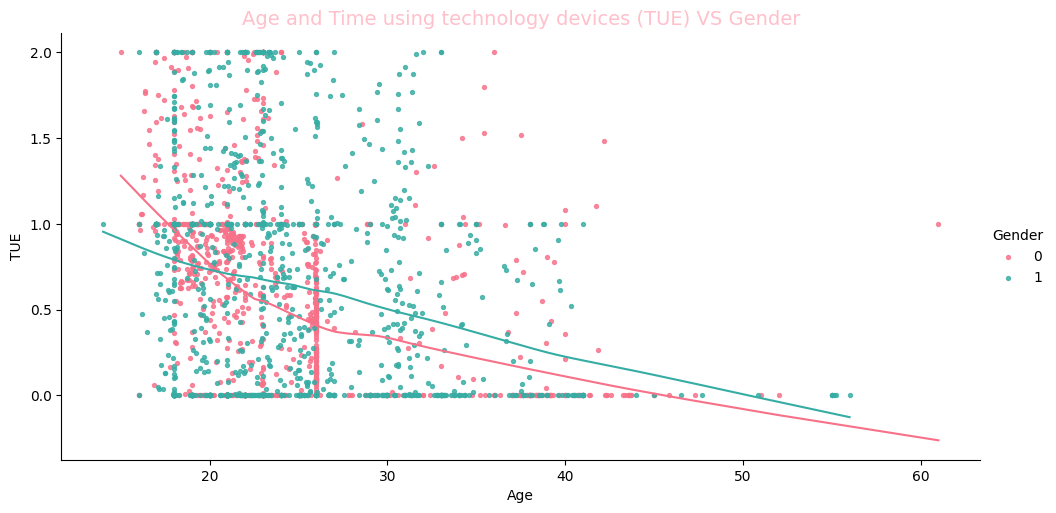

In [47]:
sns.lmplot(
    data=df,
    x="Age",
    y="TUE",
    lowess=True,
    height=5,
    aspect=2,
    hue="Gender",
    palette="husl",  # Otomatik renk paleti
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1.5},
)
plt.title(
    "Age and Time using technology devices (TUE) VS Gender",
    fontsize=14,
    color="pink",
)
plt.show()

Öncelikle bu veri seti TUE yi PC, cep telefonu, tablet vb. gibi kategorilere ayırmamaktadır.
Hem kadınlar hem de erkekler TUE'ye karşı aynı davranışı gösteriyor.
Erkek veri noktalarının kadın veri noktalarına göre daha dağınık olduğunu görebiliriz.
Kadın veri noktaları çoğunlukla 19 ila 25 yaşları arasında gruplandırılmıştır.

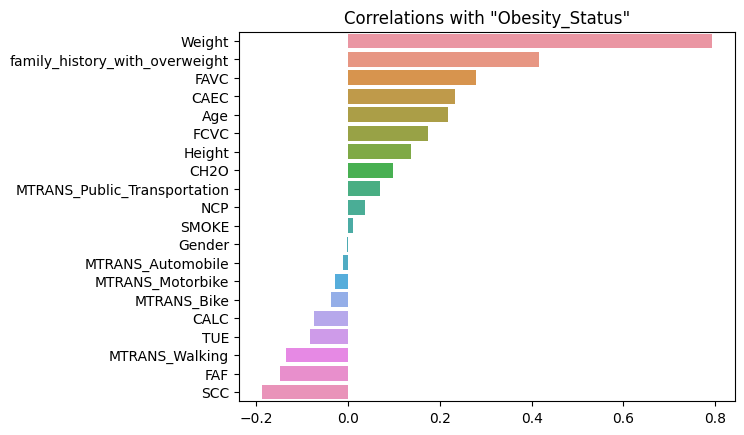

In [48]:
# "Obesity_Status" ile korelasyonlar

limit = -1.0

data = df.corr()["Obesity_Status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Obesity_Status"')
plt.show()

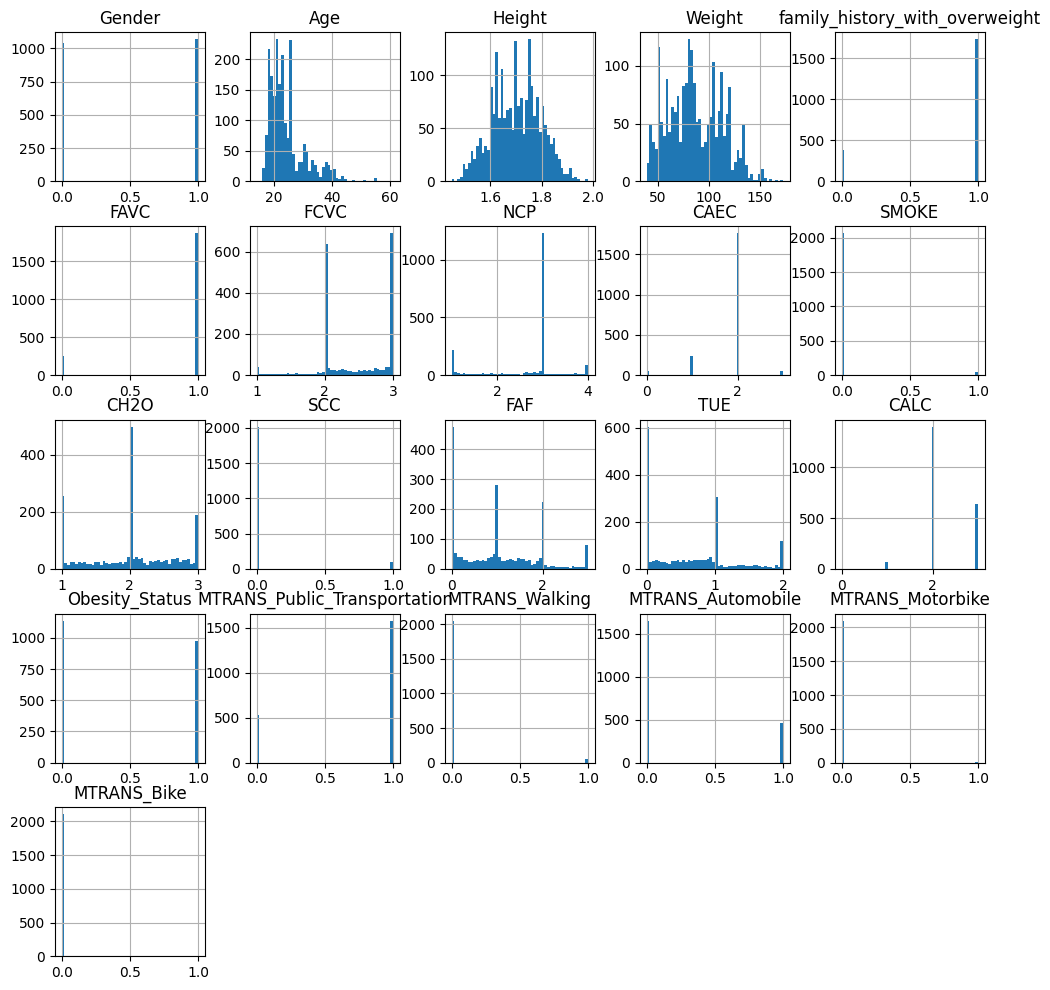

In [49]:
# Histogram Dataset

df.hist(bins=50, figsize=(12,12))
plt.show()

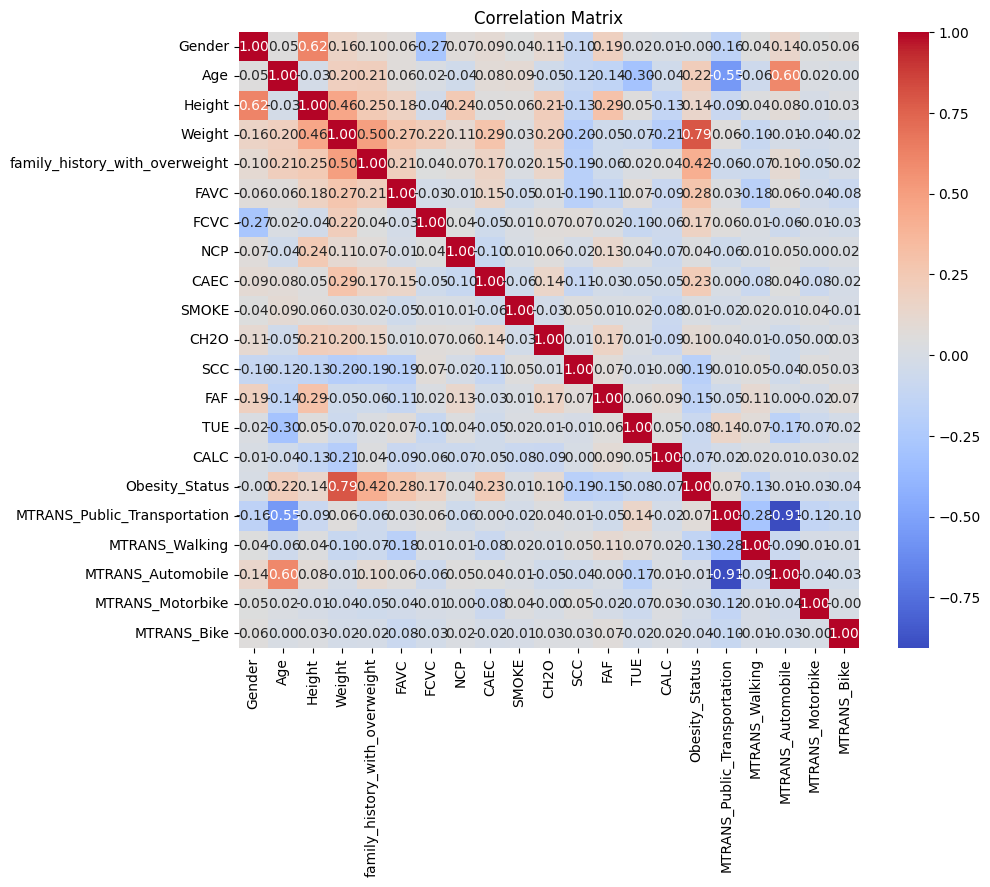

In [50]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [51]:
df.corr()[['Obesity_Status']]

,Obesity_Status
Gender,-0.001436
Age,0.217473
Height,0.137413
Weight,0.793652
family_history_with_overweight,0.416607
FAVC,0.278355
FCVC,0.174848
NCP,0.037004
CAEC,0.232819
SMOKE,0.011578


Weight, family_history_with_overweight(aile geçmişi) ve FAVC(yüksek kalorili yiyecek tüketimini) ilişkili olduğunu söyleyebiliriz.

# Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi

In [52]:
X = df[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking' ]].values

In [53]:
X[0:5]

array([[ 0., 21.,  1.,  0.,  2.,  3.,  2.,  0.,  2.,  0.,  0.,  1.,  3.,
         0.,  0.,  0.,  1.,  0.],
       [ 0., 21.,  1.,  0.,  3.,  3.,  2.,  1.,  3.,  1.,  3.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.],
       [ 1., 23.,  1.,  0.,  2.,  3.,  2.,  0.,  2.,  0.,  2.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.],
       [ 1., 27.,  0.,  0.,  3.,  3.,  2.,  0.,  2.,  0.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.],
       [ 1., 22.,  0.,  0.,  2.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.]])

In [54]:
y = df['Obesity_Status'].values

In [55]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Normalize

In [56]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [57]:
X[0:5]

array([[-1.01191369, -0.52212439,  0.47229133, -2.75976929, -0.7850187 ,
         0.40415272,  0.30034556, -0.14590027, -0.01307326, -0.21827203,
        -1.18803911,  0.56199675,  1.4191716 , -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [-1.01191369, -0.52212439,  0.47229133, -2.75976929,  1.08834176,
         0.40415272,  0.30034556,  6.85399684,  1.61875854,  4.581439  ,
         2.33975012, -1.08062463, -0.52115952, -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [ 0.98822657, -0.20688898,  0.47229133, -2.75976929, -0.7850187 ,
         0.40415272,  0.30034556, -0.14590027, -0.01307326, -0.21827203,
         1.16382038,  0.56199675, -2.46149063, -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [ 0.98822657,  0.42358183, -2.11733722, -2.75976929,  1.08834176,
         0.40415272,  0.30034556, -0.14590027, -0.01307326, -0.21827203,
         1.16382038, -1.08062463, -2.46149063, -0.525

# Train/test split

In [58]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X = df.drop('Obesity_Status', axis=1)  # Bağımsız değişkenler
y = df['Obesity_Status']  # Bağımlı değişken

# Veriyi train ve test setlere ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etmek için yazdırma
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Eğitim etiketleri boyutu:", y_train.shape)
print("Test etiketleri boyutu:", y_test.shape)

Eğitim verisi boyutu: (1688, 20)
Test verisi boyutu: (423, 20)
Eğitim etiketleri boyutu: (1688,)
Test etiketleri boyutu: (423,)


# Evoulition Metrics

In [60]:
# 'Obesity_Status' hedef değişkenimiz olsun
X = df.drop('Obesity_Status', axis=1)
y = df['Obesity_Status']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modelini oluşturalım
model = LogisticRegression()

# Modeli eğitim verisiyle uyumlaştıralım
model.fit(X_train, y_train)

# Test setinde tahminler yapalım
y_pred = model.predict(X_test)

# Hata metriklerini hesaplayalım
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Sonuçları gösterelim
print(f'Ortalama Kare Hatası (MSE): {mse}')
print(f'Ortalama Mutlak Hata (MAE): {mae}')
print(f'Kök Ortalama Kare Hatası (RMSE): {rmse}')

Ortalama Kare Hatası (MSE): 0.02364066193853428
Ortalama Mutlak Hata (MAE): 0.02364066193853428
Kök Ortalama Kare Hatası (RMSE): 0.15375520133814752


C:\Users\victus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Supervised
## Classification

# K-nn Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)


In [62]:
neighbors

KNeighborsClassifier(n_neighbors=4)

In [72]:
# Modeli oluşturup eğitme
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = knn_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test seti doğruluğu: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Test seti doğruluğu: 0.9810874704491725

Confusion Matrix:
 [[216   8]
 [  0 199]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       224
           1       0.96      1.00      0.98       199

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



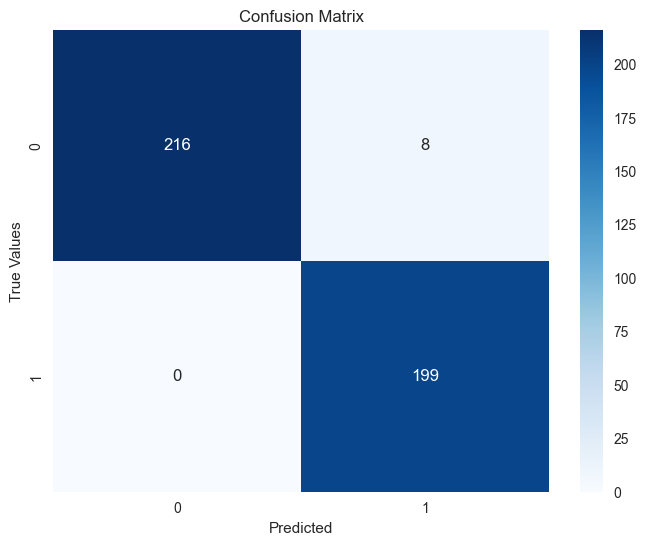

In [73]:
# Create a model using KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

216 (True Negative - TN): Gerçekte obezite olmayan bireyleri doğru bir şekilde obezite olmayan olarak tahmin etme sayısı. Bu durumlar model tarafından doğru bir şekilde sınıflandırılmıştır.

8 (False Positive - FP): Gerçekte obezite olmayan bireyleri yanlış bir şekilde obezite olarak tahmin etme sayısı. Bu durumlar model tarafından yanlış bir şekilde sınıflandırılmıştır.

0 (False Negative - FN): Gerçekte obezite olan bireyleri yanlış bir şekilde obezite olmayan olarak tahmin etme sayısı. Bu durumlar model tarafından yanlış bir şekilde sınıflandırılmıştır.

199 (True Positive - TP): Gerçekte obezite olan bireyleri doğru bir şekilde obezite olarak tahmin etme sayısı. Bu durumlar model tarafından doğru bir şekilde sınıflandırılmıştır.

# Random Forest Model

In [74]:
# Random Forest modelini oluşturalım ve eğitelim
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Eğitilen modeli kullanarak tahminler yapalım
y_pred = rfc.predict(X_test)

# modelin performansını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9810874704491725
Confusion Matrix:
[[220   4]
 [  4 195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       224
           1       0.98      0.98      0.98       199

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



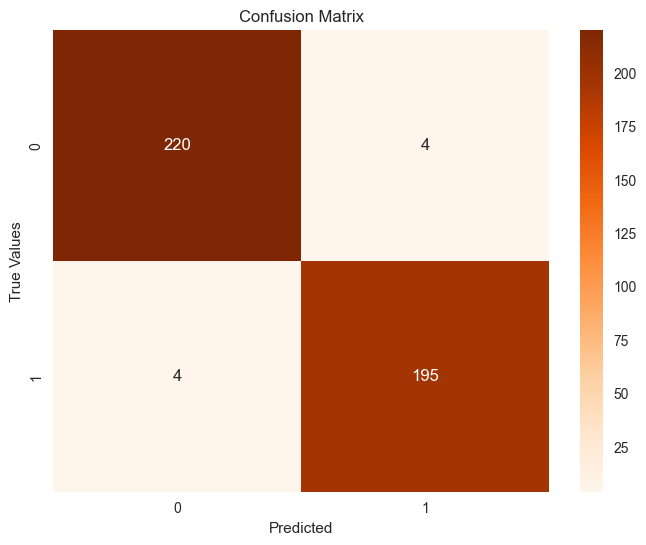

In [76]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Tahminleri alınması
y_pred = rfc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini bir ısı haritasıyla görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

Tahmin 0 (Predicted 0): Bu durum, modelin obezite olmayan kişiyi doğru bir şekilde tahmin ettiği durumu ifade eder. Yani, model 220 obezite olmayan kişiyi doğru bir şekilde sınıflandırmış.

Tahmin 1 (Predicted 1): Bu durum, modelin obezite olan kişiyi doğru bir şekilde tahmin ettiği durumu ifade eder. Yani, model 195 obezite olan kişiyi doğru bir şekilde sınıflandırmış.

Gerçekte olmayan ama modelin yanlış tahmini (False Positive): Bu durum, modelin obezite olmayan bir kişiyi yanlış bir şekilde obezite olarak tahmin ettiği durumu ifade eder. Yani, model 4 obezite olmayan kişiyi yanlış bir şekilde obezite olarak sınıflandırmış.

Gerçekte olan ama modelin yanlış tahmini (False Negative): Bu durum, modelin obezite olan bir kişiyi yanlış bir şekilde obezite olmayan olarak tahmin ettiği durumu ifade eder. Yani, model 4 obezite olan kişiyi yanlış bir şekilde obezite olmayan olarak sınıflandırmış.

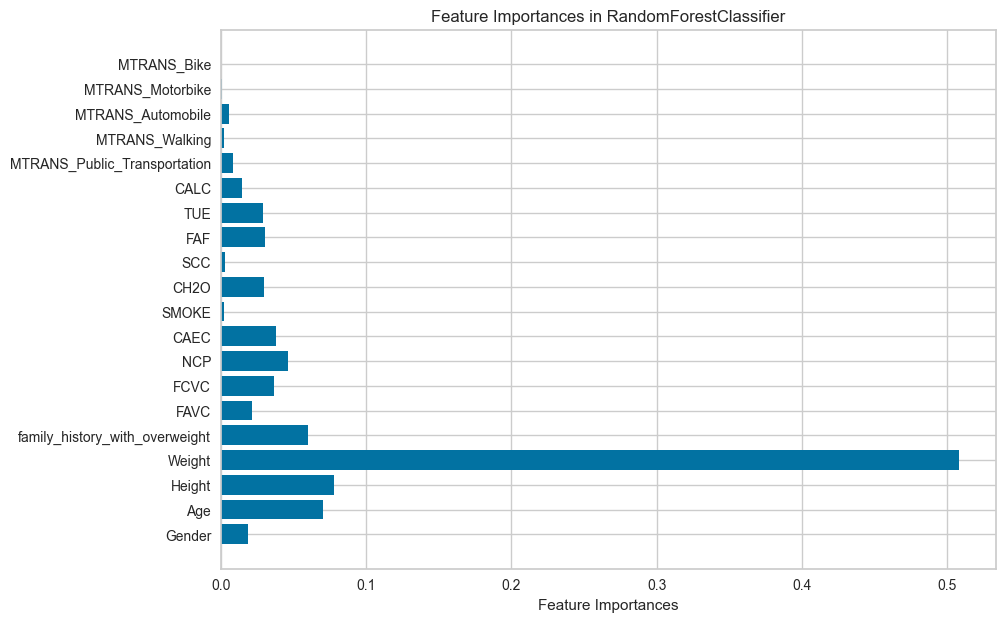

In [77]:
# Feature Importances in Random Forest(Random Forest İçin Özelliğin Önemi)

feature_names = rfc.feature_names_in_
feature_importances = rfc.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()

# SVM Model

In [158]:
# SVM modelini oluşturun ve eğitin
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

In [159]:
# Modelin performansını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9078014184397163
Confusion Matrix:
[[218   6]
 [ 33 166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       224
           1       0.97      0.83      0.89       199

    accuracy                           0.91       423
   macro avg       0.92      0.90      0.91       423
weighted avg       0.91      0.91      0.91       423



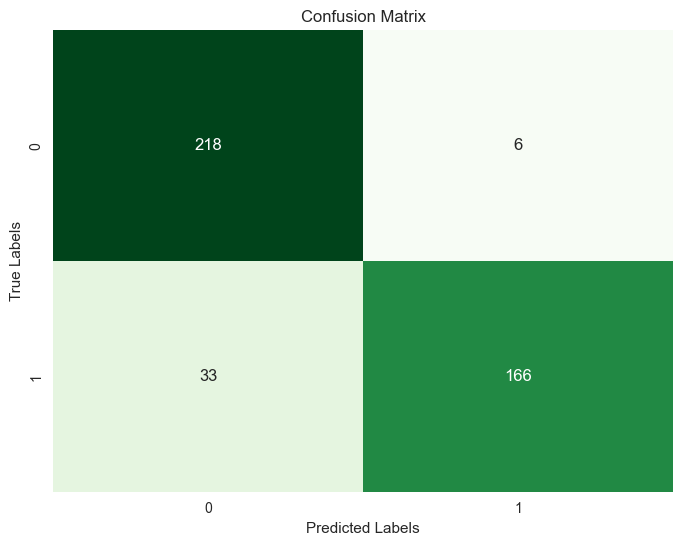

In [160]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

True Positive (TP): Gerçekte obezite olanları doğru bir şekilde tahmin etme (166).
True Negative (TN): Gerçekte obezite olmayanları doğru bir şekilde tahmin etme (218).
False Positive (FP): Gerçekte obezite olmayanları obezite olarak yanlış tahmin etme (6).
False Negative (FN): Gerçekte obezite olanları obezite olmayan olarak yanlış tahmin etme (33).

# Logistic Regression

In [283]:
# Logistic Regression modelini oluşturma
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)

In [287]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [289]:
# tahmin olasılıkları
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.98526954, 0.01473046],
       [0.09984774, 0.90015226],
       [0.96152962, 0.03847038],
       [0.91677375, 0.08322625],
       [0.80183053, 0.19816947]])

In [284]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standardize etme (isteğe bağlı)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini oluşturma
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Modelin performansını değerlendirme
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Sınıflandırma Raporu
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[224   0]
 [  2 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       224
           1       1.00      0.99      0.99       199

    accuracy                           1.00       423
   macro avg       1.00      0.99      1.00       423
weighted avg       1.00      1.00      1.00       423

Accuracy: 0.9952718676122931


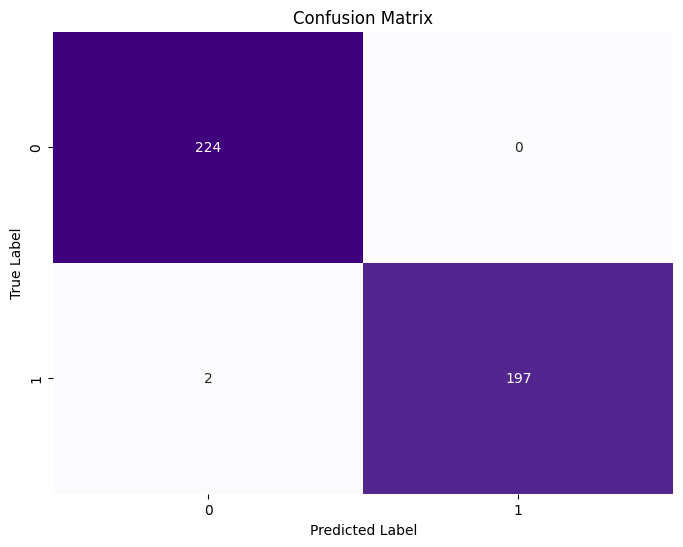

In [285]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Basit bir heatmap kullanarak confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

224 (True Negative - TN): Gerçekte obezite olmayan bireyleri doğru bir şekilde obezite olmayan olarak tahmin etme sayısı. Bu durumlar model tarafından doğru bir şekilde sınıflandırılmıştır.

0 (False Positive - FP): Gerçekte obezite olmayan bireyleri yanlış bir şekilde obezite olarak tahmin etme sayısı. Bu durumlar model tarafından yanlış bir şekilde sınıflandırılmıştır.

2 (False Negative - FN): Gerçekte obezite olan bireyleri yanlış bir şekilde obezite olmayan olarak tahmin etme sayısı. Bu durumlar model tarafından yanlış bir şekilde sınıflandırılmıştır.

197 (True Positive - TP): Gerçekte obezite olan bireyleri doğru bir şekilde obezite olarak tahmin etme sayısı. Bu durumlar model tarafından doğru bir şekilde sınıflandırılmıştır.

In [291]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)


0.8127490039840638

In [292]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.26484668368917497

C:\Users\victus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



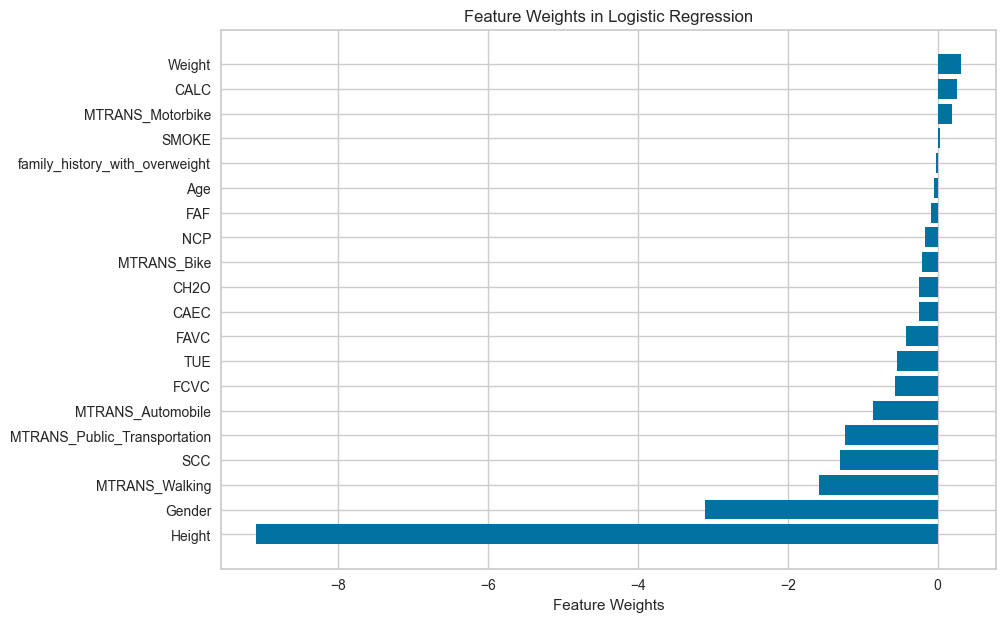

In [166]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Özellik ağırlıklarını al
feature_weights = lr.coef_[0]

# Özellik isimlerini al
feature_names = X_train.columns

# Özellik ağırlıklarını sırala
sorted_indices = feature_weights.argsort()

# Sıralanmış özellik ağırlıklarını ve isimlerini kullanarak bir çubuk grafiği çiz
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.barh(range(len(feature_weights)), feature_weights[sorted_indices])
plt.yticks(range(len(feature_weights)), feature_names[sorted_indices])
plt.title("Feature Weights in Logistic Regression")
plt.xlabel("Feature Weights")
plt.show()

# Decision Tree

In [293]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluşturun ve eğitin
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = dtc.predict(X_test)

# Accuracy değerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)

print(f'Decision Tree Model Accuracy: {accuracy}')

Decision Tree Model Accuracy: 0.9952718676122931


In [294]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Sınıflandırma Raporu
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[224   0]
 [  2 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       224
           1       1.00      0.99      0.99       199

    accuracy                           1.00       423
   macro avg       1.00      0.99      1.00       423
weighted avg       1.00      1.00      1.00       423



In [295]:
jaccard_similarity = jaccard_score(y_test, y_pred, average='micro')  # 'micro' kullanılabilir
print(f'Jaccard Similarity Score: {jaccard_similarity}')

# Log loss değerini hesaplayın
# (Not: Log loss, olasılık tahminleriyle çalışır, bu nedenle decision function veya predict_proba kullanılmalıdır)
y_pred_proba = dtc.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss}')

Jaccard Similarity Score: 0.9905882352941177
Log Loss: 0.170419164960365


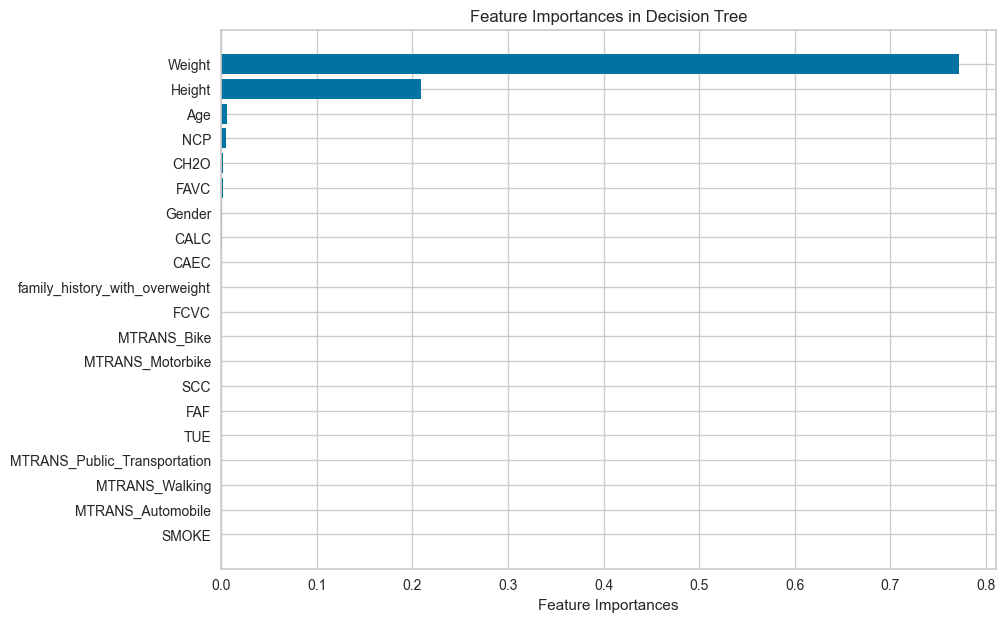

In [167]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Özellik önem sıralarını al
feature_importances = dt.feature_importances_

# Özellik isimlerini al
feature_names = X_train.columns

# Özellik önem sıralarını sırala
sorted_indices = feature_importances.argsort()

# Sıralanmış özellik önem sıralarını ve isimlerini kullanarak bir çubuk grafiği çiz
plt.figure(figsize=(10, 7))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Feature Importances")
plt.show()

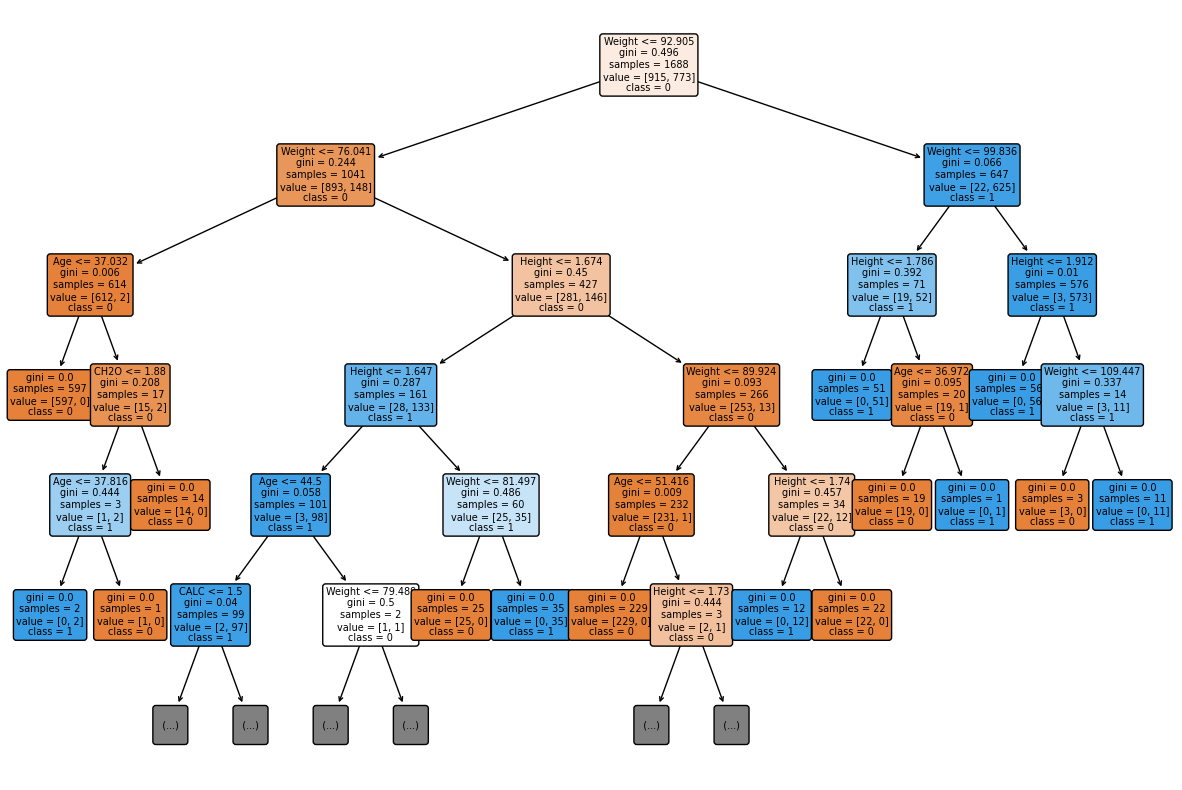

In [297]:
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X.columns, class_names=list(map(str, dtc.classes_)),
filled=True, rounded=True, fontsize=7, max_depth=5)  # Max depth değeri ayarlayarak sınırlı bir ağaç oluşturabilirsiniz
plt.show()

# Model Değerlendirme

In [298]:
# Örnek accuracy, recall, F1-score ve precision değerleri
model_1 = {'Model': 'K-nn', 'Accuracy': 0.98, 'Recall': 0.98, 'F1-score':0.98, 'Precision':0.98}
model_2 = {'Model': 'Random Forest', 'Accuracy': 0.98, 'Recall': 0.98, 'F1-score':0.98, 'Precision':0.98}
model_3 = {'Model': 'SVM', 'Accuracy':0.91, 'Recall': 0.90, 'F1-score':0.91, 'Precision':0.92}
model_4 = {'Model': 'Logistic Regression', 'Accuracy': 0.99, 'Recall': 0.99, 'F1-score':1.00, 'Precision':1.00}
model_5 = {'Model': 'Decision Tree', 'Accuracy': 1.00, 'Recall': 0.99, 'F1-score':1.00, 'Precision':1.00}
# Liste oluşturma
models = [model_1, model_2, model_3, model_4, model_5]

# Liste üzerinden bir DataFrame oluşturma
df = pd.DataFrame(models)

# DataFrame'i gösterme
print(df)

                 Model  Accuracy  Recall  F1-score  Precision
0                 K-nn      0.98    0.98      0.98       0.98
1        Random Forest      0.98    0.98      0.98       0.98
2                  SVM      0.91    0.90      0.91       0.92
3  Logistic Regression      0.99    0.99      1.00       1.00
4        Decision Tree      1.00    0.99      1.00       1.00


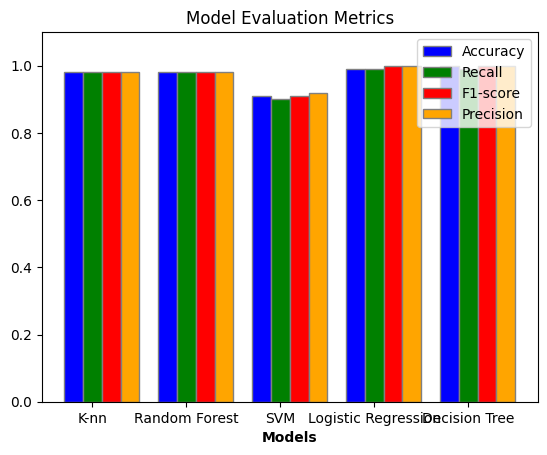

In [348]:
# Verileri tanımla
models = ['K-nn', 'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree']
accuracy = [0.98, 0.98, 0.91, 0.99, 1.00]
recall = [0.98, 0.98, 0.90, 0.99, 0.99]
f1_score = [0.98, 0.98, 0.91, 1.00, 1.00]
precision = [0.98, 0.98, 0.92, 1.00, 1.00]

# Genişlik ayarı
bar_width = 0.2

# Çubukların konumları
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Çubuk grafikleri çiz
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')
plt.bar(r4, precision, color='orange', width=bar_width, edgecolor='grey', label='Precision')

# Eksen etiketleri ve başlık
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylim(0, 1.1)
plt.title('Model Evaluation Metrics')

# Göster
plt.legend()
plt.show()